# Loan Prediction Model

Loan predicitions are generally required in real world situations such as application in loans for retail banking. It is really powerful how the bank can automate base on deciding whether or not they issue a loan. 

__Model:__ This model is to be able to predict whether a application of a loan is accepted or not, also known as a classification problem.

__Dataset:__ https://datahack.analyticsvidhya.com/contest/practice-problem-loan-prediction-iii/

__Key Takeaway:__

* most correlated variables are (Applicant Income - Loan Amount) and (Credit History - Loan Status).

* Logistic Regression Model is 80% Accuracy.

## Steps:

- Step 1: Import data

- Step 2: Visualize the date by undertaking Univariate and Bivariate Analysis

- Step 3: Cleaning the Data

- Step 4: Machine Learning

## Import Data & Python Packages

In [1]:
#standard importing your libraries
import pandas as pd 
import numpy as np                     # For mathematical calculations 
import seaborn as sns                  # For data visualization 
import matplotlib.pyplot as plt        # For plotting graphs 
import warnings                        # To ignore any warnings warnings.filterwarnings("ignore")
import os

In [2]:
# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "images"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "", CHAPTER_ID)

# Function to save figures
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=450):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    #if tight_layout:
    #   plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## Import Data

In [3]:
train = pd.read_csv('TrainData-LoanPrediction.csv')
test = pd.read_csv('TestData-LoanPrediction.csv')
train_original = train.copy() #copy of train data, to preserve original data from changes
test_original = train.copy()
print(train.columns)#check the columns
print(train.dtypes) #check datatypes
print(train.shape, test.shape) #check the number of rows and columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')
Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object
(614, 13) (367, 12)


## Univarient Analysis

In [4]:
# Close all graph plots
plt.close('all')

#Catogarical counts of Loan_Status
print("Loan_Status counts: \n",train['Loan_Status'].value_counts())
# 472 Approved and 192 Not Approved

#Catogarical propotions of Loan_Status
print("Loan_Status counts: \n",train['Loan_Status'].value_counts(normalize = True)) 
# 472 68% Approved and 31% Not approved

Loan_Status counts: 
 Y    422
N    192
Name: Loan_Status, dtype: int64
Loan_Status counts: 
 Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64


Saving figure Uni_Loan_Status


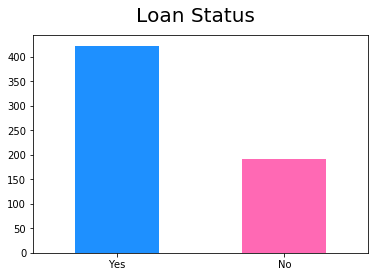

In [5]:
#plot Loan_Status
plt.figure(1)
train['Loan_Status'].value_counts().plot.bar(color =('dodgerblue','hotpink')).set_xticklabels( ('Yes', 'No') )
plt.xticks(rotation=0)
plt.suptitle('Loan Status', fontsize=20)
save_fig("Uni_Loan_Status")
# We have a little less than half of our loans classified as not accepted, we should therefore perform stratefied cv.

Saving figure Uni_Background_of_Applicants
Saving figure Uni_Further_Background_of_Applicants


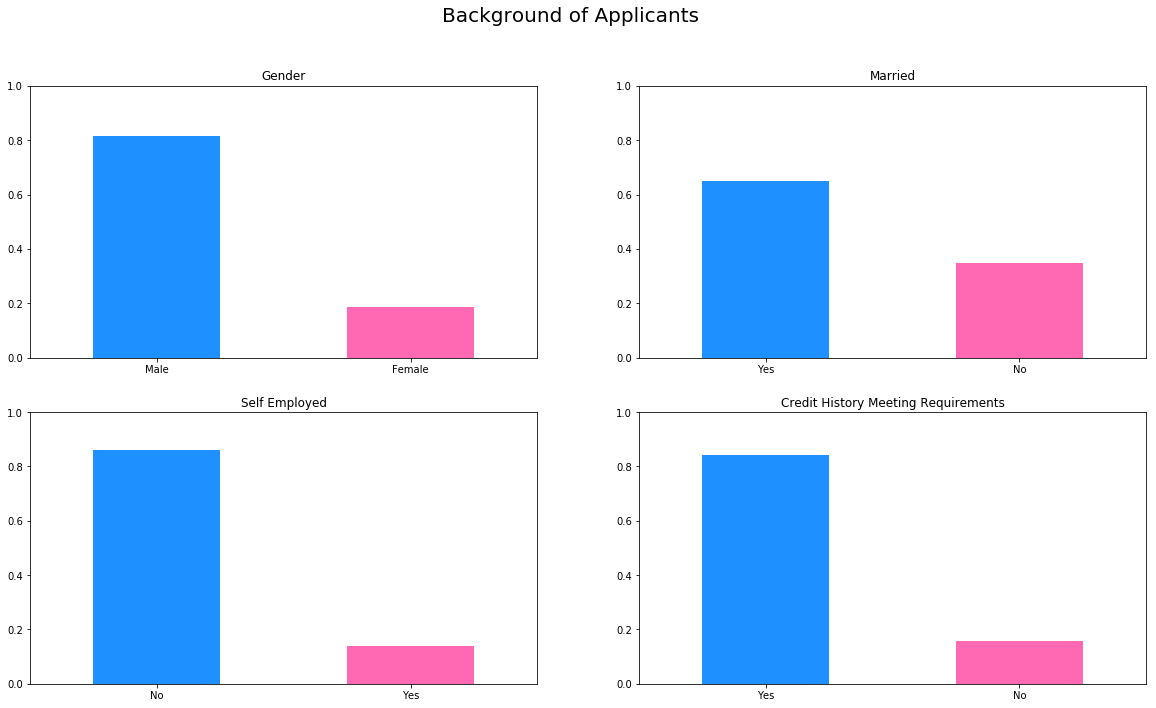

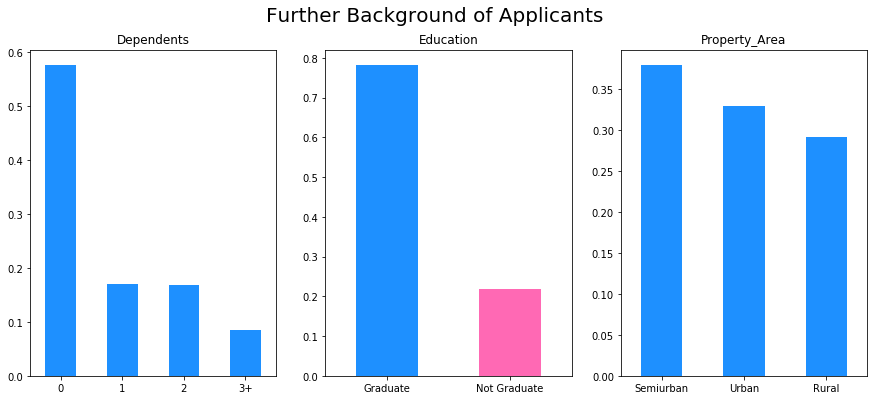

In [6]:
#Status and background of Applicants
plt.figure(2)
#Plot 1
plt.subplot(221)
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,11),title= 'Gender', color =('dodgerblue','hotpink')) 
plt.ylim((0,1))
plt.xticks(rotation=0)
#Plot 2
plt.subplot(222) 
train['Married'].value_counts(normalize=True).plot.bar(title= 'Married', color =('dodgerblue','hotpink'))
plt.ylim((0,1))
plt.xticks(rotation=0)
#Plot 3
plt.subplot(223) 
train['Self_Employed'].value_counts(normalize=True).plot.bar(title= 'Self Employed', color =('dodgerblue','hotpink'))
plt.ylim((0,1))
plt.xticks(rotation=0)
#Plot 4
plt.subplot(224) 
train['Credit_History'].value_counts(normalize=True).plot.bar(title= 'Credit History Meeting Requirements', color =('dodgerblue','hotpink')).set_xticklabels( ('Yes', 'No') )
plt.ylim((0,1))
plt.xticks(rotation=0)
#Details
plt.suptitle('Background of Applicants', fontsize=20)
save_fig("Uni_Background_of_Applicants")

plt.figure(3)
#Plot 1
plt.subplot(131)
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(15,6), title= 'Dependents',color =('dodgerblue'))
plt.xticks(rotation=0)
#Plot 2
plt.subplot(132)
train['Education'].value_counts(normalize=True).plot.bar(title= 'Education',color =('dodgerblue','hotpink'))
plt.xticks(rotation=0)
#Plot 3
plt.subplot(133) 
train['Property_Area'].value_counts(normalize=True).plot.bar(title= 'Property_Area', color =('dodgerblue'))
plt.xticks(rotation=0)
#Details
plt.suptitle('Further Background of Applicants', fontsize=20)
save_fig("Uni_Further_Background_of_Applicants")

Saving figure Uni_Applicant_Income
Saving figure Uni_Coapplicant_Income


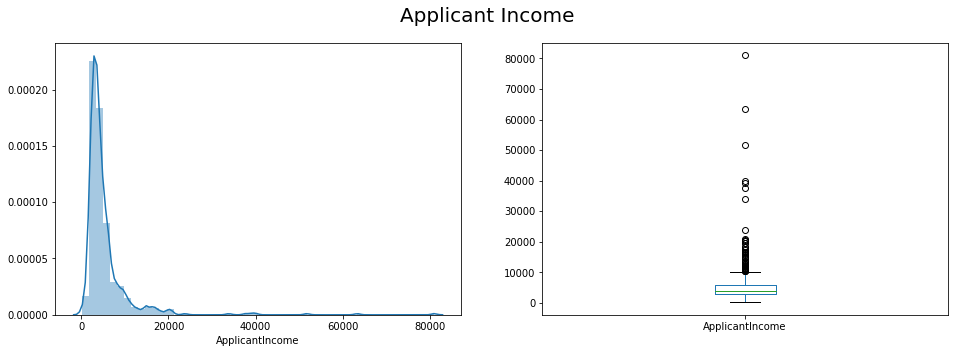

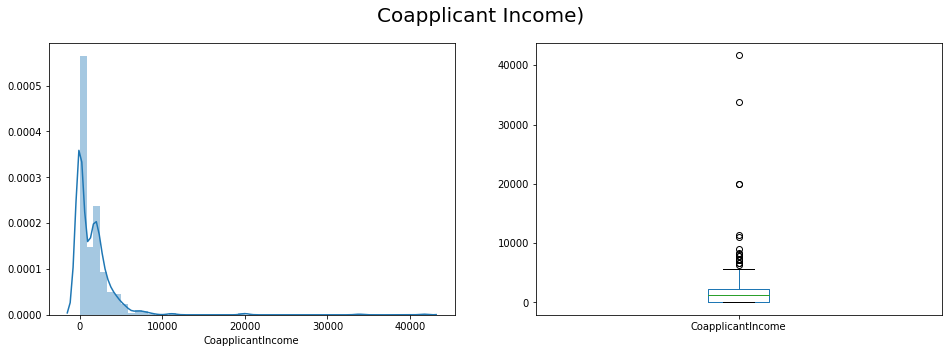

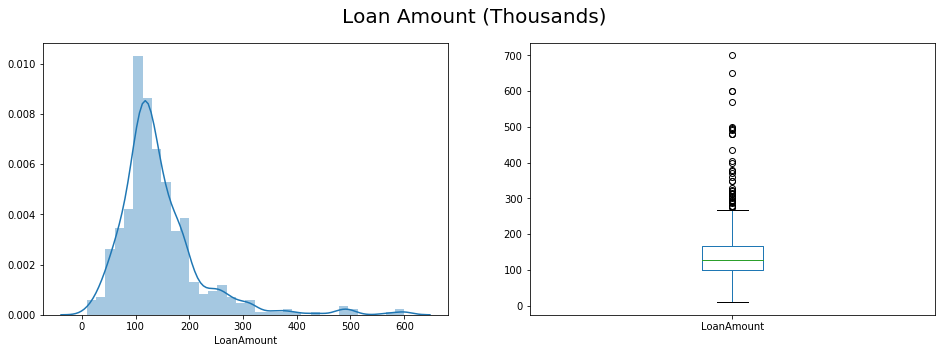

Saving figure Uni_Loan_Amount


<Figure size 432x288 with 0 Axes>

In [7]:
plt.figure(4)
plt.subplot(121)
sns.distplot(train['ApplicantIncome'], bins=50, kde=True)
plt.subplot(122)
train['ApplicantIncome'].plot.box(figsize=(16,5))
#plt.ylim((0,30000))
plt.suptitle('Applicant Income', fontsize=20)
save_fig("Uni_Applicant_Income")

plt.figure(5)
plt.subplot(121) 
sns.distplot(train['CoapplicantIncome'])
plt.subplot(122) 
train['CoapplicantIncome'].plot.box(figsize=(16,5))
plt.suptitle('Coapplicant Income)', fontsize=20)
save_fig("Uni_Coapplicant_Income")

plt.figure(6)
plt.subplot(121) 
df=train.dropna() 
sns.distplot(df['LoanAmount'])
plt.subplot(122) 
train['LoanAmount'].plot.box(figsize=(16,5))
plt.suptitle('Loan Amount (Thousands)', fontsize=20)
plt.show()
save_fig("Uni_Loan_Amount")

## Bivariant Analysis


Saving figure Bivariant_Gender
Saving figure Bivariant_Married
Saving figure Bivariant_Dependents
Saving figure Bivariant_Education
Saving figure Bivariant_Self_Employed
Saving figure Bivariant_Credit_History
Saving figure Bivariant_Property_Area


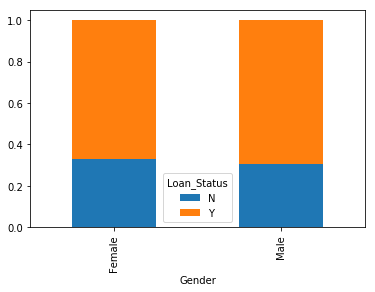

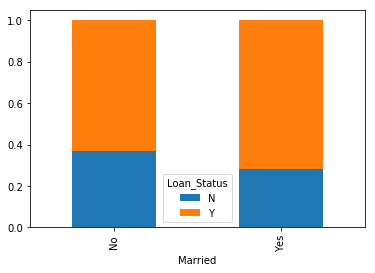

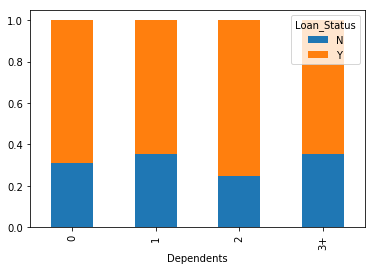

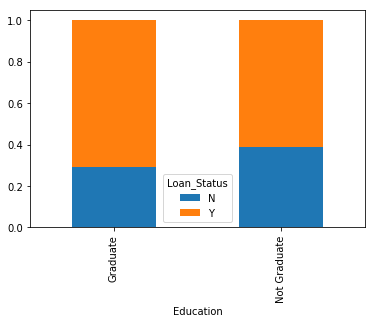

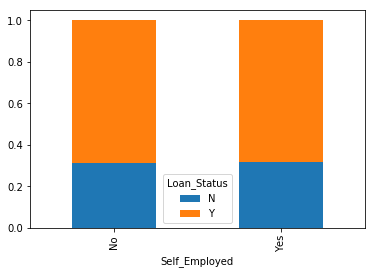

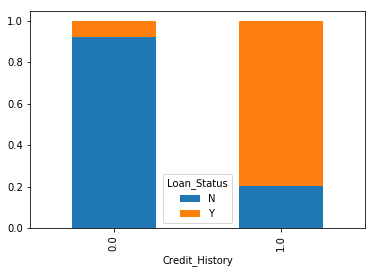

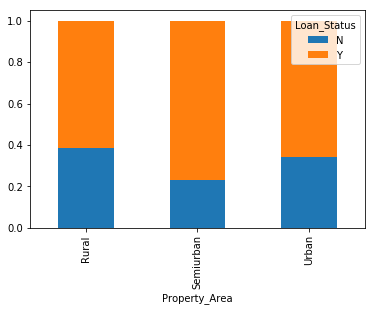

In [8]:
#plot relationship between catogarical data and loan status
#Crosstab function is like plotting it in a matrix/PivotTable
Gender = pd.crosstab(train['Gender'],train['Loan_Status']) 
Married = pd.crosstab(train['Married'],train['Loan_Status']) 
Dependents = pd.crosstab(train['Dependents'],train['Loan_Status']) 
Education = pd.crosstab(train['Education'],train['Loan_Status']) 
Self_Employed = pd.crosstab(train['Self_Employed'],train['Loan_Status']) 
Credit_History = pd.crosstab(train['Credit_History'],train['Loan_Status']) 
Property_Area = pd.crosstab(train['Property_Area'],train['Loan_Status']) 

#Plot of 7 figures

Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
save_fig("Bivariant_Gender")

Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
save_fig("Bivariant_Married")

Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
save_fig("Bivariant_Dependents")

Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
save_fig("Bivariant_Education")

Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
save_fig("Bivariant_Self_Employed")

Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
save_fig("Bivariant_Credit_History")

Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
save_fig("Bivariant_Property_Area")

Saving figure Bivariant_ApplicantIncome
Saving figure Bivariant_CoapplicantIncome


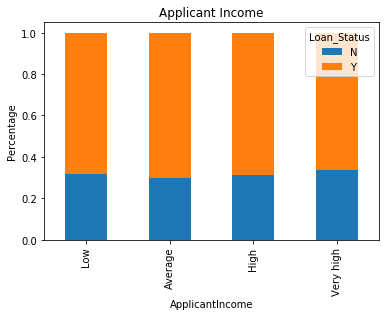

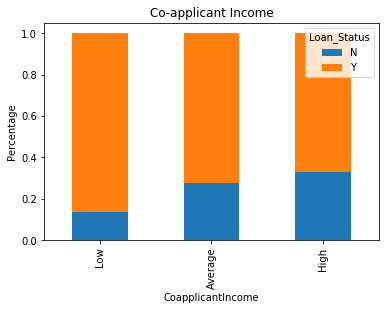

In [9]:
#Applicant income variable in category
bins = [0,2500,4000,6000,81000] #0-2499, 2500-3999, 4000-5999, 6000-80999
groupA = ['Low','Average','High', 'Very high'] 
train['Income_bin'] = pd.cut(train['ApplicantIncome'],bins,labels = groupA)
Income_bin = pd.crosstab(train['Income_bin'],train['Loan_Status']) 
#analyze the corresponding loan status for each bin
Income_bin.div(Income_bin.sum(1).astype(float), axis = 0).plot(title= 'Applicant Income',kind = "bar", stacked = True) 
plt.xlabel('ApplicantIncome') 
plt.ylabel('Percentage')
save_fig("Bivariant_ApplicantIncome")

#coapplicant income and loan amount variable 
bins = [0,1000,3000,42000] 
groupC = ['Low','Average','High'] 
train['Coapplicant_Income_bin'] = pd.cut(train['CoapplicantIncome'],bins,labels = groupC)
Coapplicant_Income_bin = pd.crosstab(train['Coapplicant_Income_bin'],train['Loan_Status'])
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis = 0).plot(title= 'Co-applicant Income',kind = "bar", stacked = True)
plt.xlabel('CoapplicantIncome')
plt.ylabel('Percentage') 
save_fig("Bivariant_CoapplicantIncome")

It shows that the lower the coapplicant’s income the chances of loan approval are higher. But this does sound right. The possible reason behind this may be that most of the applicants don’t have any coapplicant so the coapplicant income for such applicants is 0 and hence the loan approval is not dependent on it. 

So we can make a new variable in which we will combine the applicant’s and coapplicant’s income to visualize the combined effect of income on loan approval.


Saving figure Bivariant_Total_Income


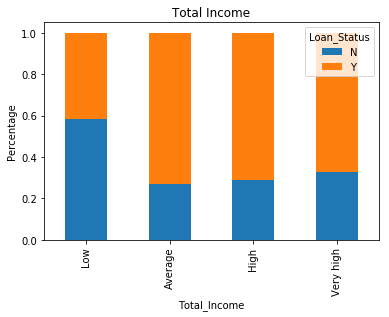

In [10]:
train['Total_Income'] = train['ApplicantIncome'] + train['CoapplicantIncome']
bins = [0,2500,4000,6000,81000] 
groupT = ['Low','Average','High', 'Very high']
train['Total_Income_bin'] = pd.cut(train['Total_Income'],bins,labels = groupT)
Total_Income_bin = pd.crosstab(train['Total_Income_bin'],train['Loan_Status']) 
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis = 0).plot(title= 'Total Income',kind = "bar", stacked = True)
plt.xlabel('Total_Income') 
plt.ylabel('Percentage')
save_fig("Bivariant_Total_Income")

Saving figure Bivariant_LoanAmount


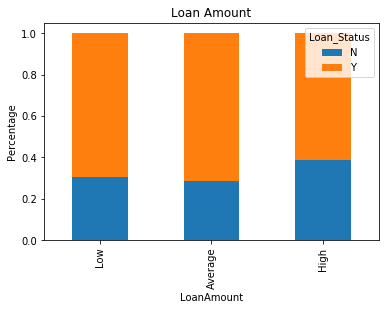

In [11]:
#visualize the Loan amount variable
bins = [0,100,200,700] 
groupL = ['Low','Average','High'] 
train['LoanAmount_bin'] = pd.cut(train['LoanAmount'], bins, labels = groupL)
LoanAmount_bin = pd.crosstab(train['LoanAmount_bin'],train['Loan_Status']) 
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(title= 'Loan Amount', kind="bar", stacked=True)
plt.xlabel('LoanAmount') 
plt.ylabel('Percentage')
save_fig("Bivariant_LoanAmount")

## Heatmap and Correlations

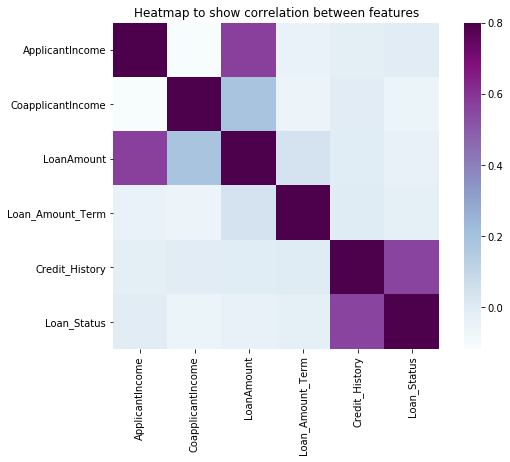

Saving figure Bivariant_HeatMap


<Figure size 432x288 with 0 Axes>

In [12]:
#drop the bins which we created for the exploration part
train = train.drop(['Income_bin', 'Coapplicant_Income_bin', 'LoanAmount_bin', 'Total_Income_bin', 'Total_Income'], axis=1)

#change the 3+ in dependents variable to 3 to make it a numerical variable
train['Dependents'].replace('3+', 3,inplace=True) 
test['Dependents'].replace('3+', 3,inplace=True)

#convert the target variable’s categories into 0 and 1 so that we can find its correlation with numerical variables.  replace N with 0 and Y with 1.
train['Loan_Status'].replace('N', 0,inplace=True) 
train['Loan_Status'].replace('Y', 1,inplace=True)

#create heat map to visualize correlation between all the numerical variables
matrix = train.corr() 
ax = plt.subplots(figsize=(9, 6)) 
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu").set_title('Heatmap to show correlation between features')
plt.show()
save_fig("Bivariant_HeatMap")
#most correlated variables are (ApplicantIncome - LoanAmount) and (Credit_History - Loan_Status).
#LoanAmount is also correlated with CoapplicantIncome

## Data Cleaning

In [13]:
#this a model created using sklearn open library
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
    
train = pd.read_csv('TrainData-LoanPrediction.csv')
test = pd.read_csv('TestData-LoanPrediction.csv')
train_original = train.copy() #copy of train data, to preserve original data from changes
test_original = train.copy()

print(train.isnull().sum())

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [14]:
#Fill numerical values with mean and catogarical values with mode.
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True) 
train['Married'].fillna(train['Married'].mode()[0], inplace=True) 
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True) 
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True) 
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)

print(train['Loan_Amount_Term'].value_counts()) #loan amount term 360 is the mode 

train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)

#use median to fill the null values in loan amount. as earlier we saw that loan amount have outliers so the mean will not be the 
#proper approach as it is highly affected by the presence of outliers
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

#treat missing values in test data as we did for training data
test['Gender'].fillna(train['Gender'].mode()[0], inplace=True) 
test['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True) 
test['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True) 
test['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True) 
test['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True) 
test['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64


In [15]:
# Undertaken this to improve the accuracy of predicting Loan Approvals
#remove the skewness in loan amount by doing the log transformation. it does not affect the smaller values much, but reduces the larger values.
train['LoanAmount_log'] = np.log(train['LoanAmount']) 
test['LoanAmount_log'] = np.log(test['LoanAmount'])

## Model Training

In [16]:
#no need Loan_ID for training so drop it
train = train.drop('Loan_ID',axis=1) 
test = test.drop('Loan_ID',axis=1)

X = train.drop('Loan_Status',1)  
y = train.Loan_Status #Series DataType

#this will convert catogarical data to 0 and 1 which makes easy to learn by the model
X = pd.get_dummies(X) 
train = pd.get_dummies(train) 
test = pd.get_dummies(test)

In [17]:
#split train data into train and validation
x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size =0.3)

model = LogisticRegression(solver='lbfgs') 
model.fit(x_train, y_train)

#set hyperparameters 
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True, intercept_scaling=1, 
	max_iter=10000, multi_class='ovr', n_jobs=1, penalty='l2', random_state=1, solver='liblinear', tol=0.0001,          
	verbose=0, warm_start=False)

#validate trained model using validation set 
pred_cv = model.predict(x_cv)
score = accuracy_score(y_cv,pred_cv)

print("Model Accuracy = ",score)
#Score = 0.768

#prediction
pred_test = model.predict(test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_cv, pred_cv)
print(cm)

Model Accuracy =  0.7783783783783784
[[ 30  31]
 [ 10 114]]


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


## Stratified K-Fold

In [18]:
i = 1
kf = StratifiedKFold(n_splits = 5, random_state = 1,shuffle = True)
for train_index, test_index in kf.split(X,y):
	print('\n{} of kfold {}'.format(i,kf.n_splits))
	xtr,xvl = X.loc[train_index],X.loc[test_index]     
	ytr,yvl = y[train_index],y[test_index]

	model = LogisticRegression(random_state=1, solver = 'lbfgs', max_iter = 10000)
	model.fit(xtr, ytr)  
	pred_test = model.predict(xvl)
	score = accuracy_score(yvl,pred_test)
	print('accuracy_score',score)
	i += 1

kfpred_test = model.predict(test)
kfpred = model.predict_proba(xvl)[:,1]


1 of kfold 5
accuracy_score 0.8064516129032258

2 of kfold 5
accuracy_score 0.8306451612903226

3 of kfold 5
accuracy_score 0.8114754098360656

4 of kfold 5
accuracy_score 0.7868852459016393

5 of kfold 5
accuracy_score 0.8278688524590164
